In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress, spearmanr, kendalltau
from sklearn.feature_selection import mutual_info_regression
import numpy as np

In [33]:
# Load datasets
train_path = 'train.csv'
train_df = pd.read_csv(train_path)
model_df = train_df.copy()
numeric_columns = model_df.select_dtypes(include=['int64','float64']).columns

model_df=model_df.fillna(model_df[numeric_columns].mean().to_dict())
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [34]:
# Descriptive statistics for numerical features
numerical_features = train_df.select_dtypes(include=['float64', 'int64']).columns
desc_stats = train_df[numerical_features].describe()

print("Descriptive Statistics:")
print(desc_stats)

# Frequency distribution for categorical features
categorical_features = train_df.select_dtypes(include=['object', 'category']).columns
for feature in categorical_features:
    print(f"Frequency distribution for {feature}:")
    print(train_df[feature].value_counts())

# for feature in numerical_features:
#     plt.figure(figsize=(6, 4))
#     sns.boxplot(train_df[feature])
#     plt.title(f"Boxplot of {feature}")
#     plt.show()

KeyboardInterrupt: 

In [4]:
# Count rows with missing values in 'id'
id_missing_count = train_df['id'].isnull().sum()
print(f"Number of rows with missing 'id': {id_missing_count}")


Number of rows with missing 'id': 0


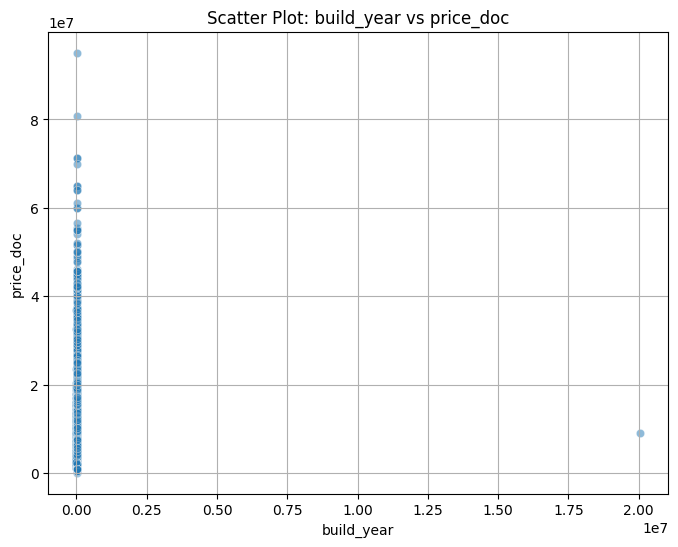

Linear Analysis for build_year:
  Slope: 0.07026244876426346
  Intercept: 7710479.409332109
  R-squared: 4.6696407996684085e-06
  P-value: 0.7790031220921888
  Standard Error: 0.2503803449477376

Spearman Correlation for build_year: 0.04312468604985043, P-value: 2.1096741326549327e-08
Kendall Correlation for build_year: 0.03721477689447134, P-value: 8.172787334847747e-13
Mutual Information for build_year: 0.2814466322149718



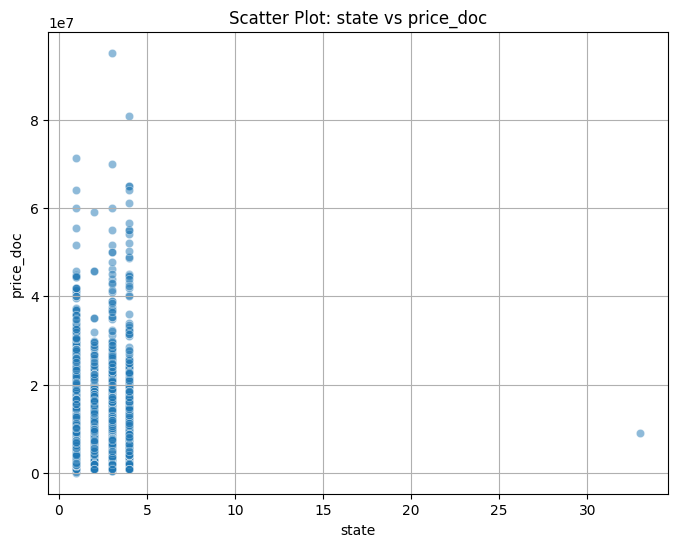

Linear Analysis for state:
  Slope: 684953.5422641474
  Intercept: 6195723.568587948
  R-squared: 0.014714488747159988
  P-value: 1.8612820133095597e-56
  Standard Error: 43102.034662596874

Spearman Correlation for state: 0.16494342395263994, P-value: 1.927189096177001e-103
Kendall Correlation for state: 0.12908216142382709, P-value: 2.519087106846027e-106
Mutual Information for state: 0.3325169530392311



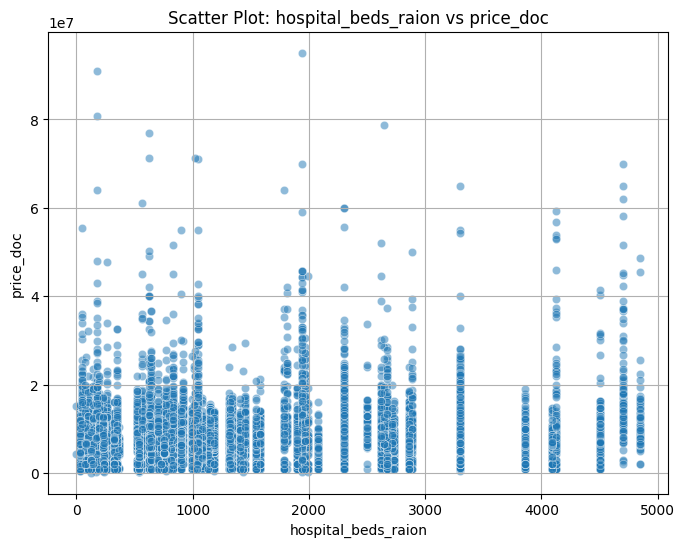

Linear Analysis for hospital_beds_raion:
  Slope: 776.643789791218
  Intercept: 6784209.562879897
  R-squared: 0.021649216267914686
  P-value: 2.8461581724227695e-78
  Standard Error: 41.23902759402735

Spearman Correlation for hospital_beds_raion: 0.08521117453535917, P-value: 3.1763177859308364e-27
Kendall Correlation for hospital_beds_raion: 0.05649643658312675, P-value: 4.3036999182995694e-26
Mutual Information for hospital_beds_raion: 0.3706488254198863



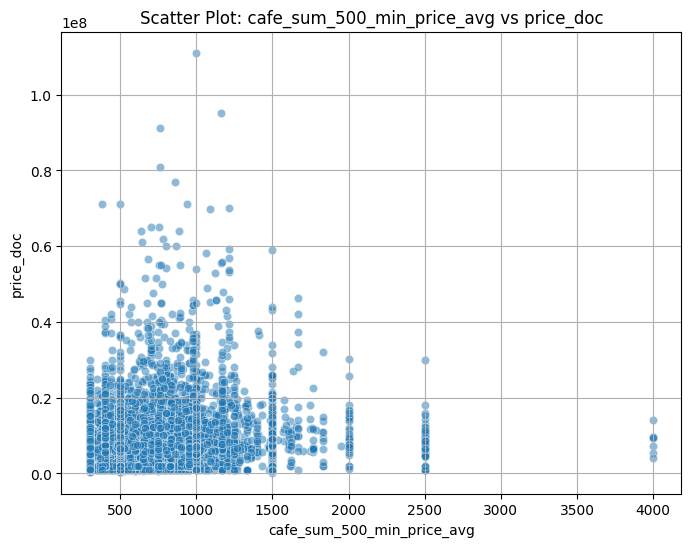

Linear Analysis for cafe_sum_500_min_price_avg:
  Slope: 602.0043364079224
  Intercept: 7551508.930077062
  R-squared: 0.001327146619836226
  P-value: 1.773979323261066e-06
  Standard Error: 125.9618750450399

Spearman Correlation for cafe_sum_500_min_price_avg: -0.0033255415517901656, P-value: 0.6628487873086502
Kendall Correlation for cafe_sum_500_min_price_avg: -0.0005896035380078715, P-value: 0.9105575919674573
Mutual Information for cafe_sum_500_min_price_avg: 0.14565314919493844



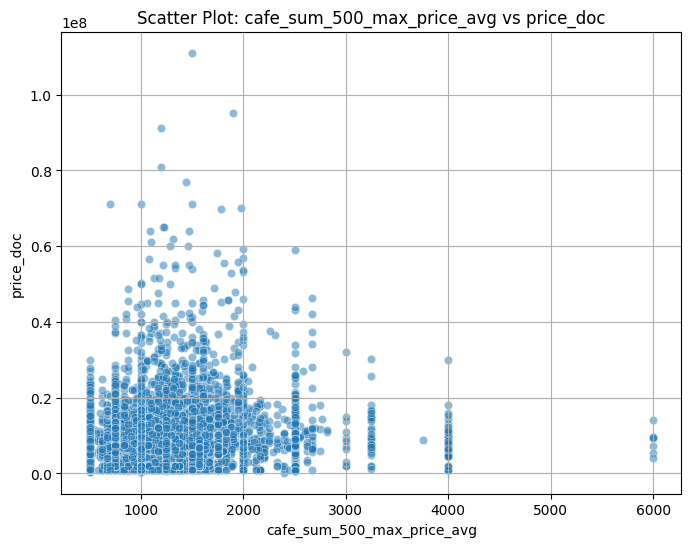

Linear Analysis for cafe_sum_500_max_price_avg:
  Slope: 405.7896405607072
  Intercept: 7491757.310567999
  R-squared: 0.0014369103321871448
  P-value: 6.647669679482379e-07
  Standard Error: 81.59455982335756

Spearman Correlation for cafe_sum_500_max_price_avg: -0.006426126330614716, P-value: 0.39951878877316027
Kendall Correlation for cafe_sum_500_max_price_avg: -0.002931832130221831, P-value: 0.580874971664928
Mutual Information for cafe_sum_500_max_price_avg: 0.1500570402471446



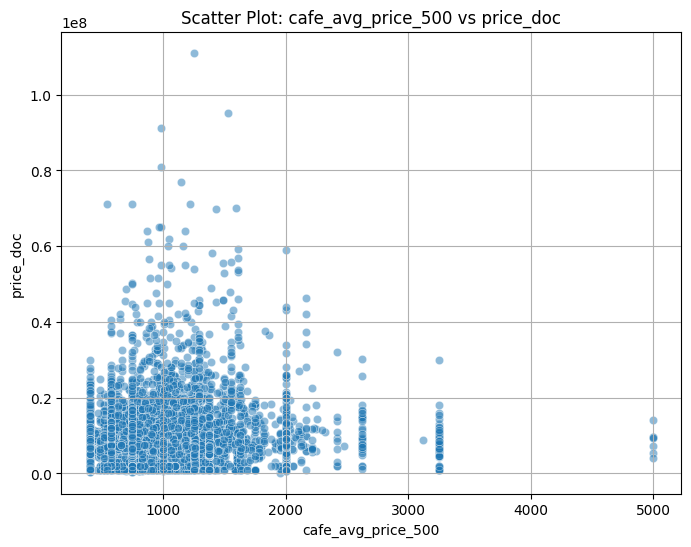

Linear Analysis for cafe_avg_price_500:
  Slope: 487.9026605617728
  Intercept: 7512727.545136246
  R-squared: 0.0014016380995073617
  P-value: 9.110222432227717e-07
  Standard Error: 99.3340154175345

Spearman Correlation for cafe_avg_price_500: -0.006497819301645887, P-value: 0.39428053770575777
Kendall Correlation for cafe_avg_price_500: -0.00284652213470662, P-value: 0.5862554136961737
Mutual Information for cafe_avg_price_500: 0.15337846828681645



In [ ]:
# Define threshold for missing values
threshold = 0.4

# Calculate percentage of missing values in train dataset
missing_percentage = train_df.isnull().mean()
columns_above_threshold = missing_percentage[missing_percentage > threshold].index.tolist()

# Prepare scatter plots and analyze relationships
for column in columns_above_threshold:
    if column != 'price_doc' and column in train_df.columns and pd.api.types.is_numeric_dtype(train_df[column]):
        # Scatter plot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=train_df[column], y=train_df['price_doc'], alpha=0.5, edgecolor='w')
        plt.title(f"Scatter Plot: {column} vs price_doc")
        plt.xlabel(column)
        plt.ylabel('price_doc')
        plt.grid(True)
        plt.show()

        # Analyze relationships (linear, Spearman, Kendall, Mutual Information)
        valid_data = train_df[[column, 'price_doc']].dropna()
        if len(valid_data) > 1:
            # Linear regression
            slope, intercept, r_value, p_value, std_err = linregress(valid_data[column], valid_data['price_doc'])
            print(f"Linear Analysis for {column}:")
            print(f"  Slope: {slope}")
            print(f"  Intercept: {intercept}")
            print(f"  R-squared: {r_value**2}")
            print(f"  P-value: {p_value}")
            print(f"  Standard Error: {std_err}\n")

            # Spearman correlation
            spearman_corr, spearman_p = spearmanr(valid_data[column], valid_data['price_doc'])
            print(f"Spearman Correlation for {column}: {spearman_corr}, P-value: {spearman_p}")

            # Kendall correlation
            kendall_corr, kendall_p = kendalltau(valid_data[column], valid_data['price_doc'])
            print(f"Kendall Correlation for {column}: {kendall_corr}, P-value: {kendall_p}")

            # Mutual information
            mutual_info = mutual_info_regression(valid_data[[column]], valid_data['price_doc'], random_state=0)
            print(f"Mutual Information for {column}: {mutual_info[0]}\n")
        else:
            print(f"Insufficient valid data for {column}.")

In [6]:
# Drop specified columns
columns_to_drop = ['cafe_sum_500_max_price_avg', 'cafe_avg_price_500', 'cafe_sum_500_min_price_avg', 'build_year']
train_df = train_df.drop(columns=[col for col in columns_to_drop if col in train_df.columns])


Missing Percentage for 'state': 44.50%
Missing Percentage for 'hospital_beds_raion': 47.39%


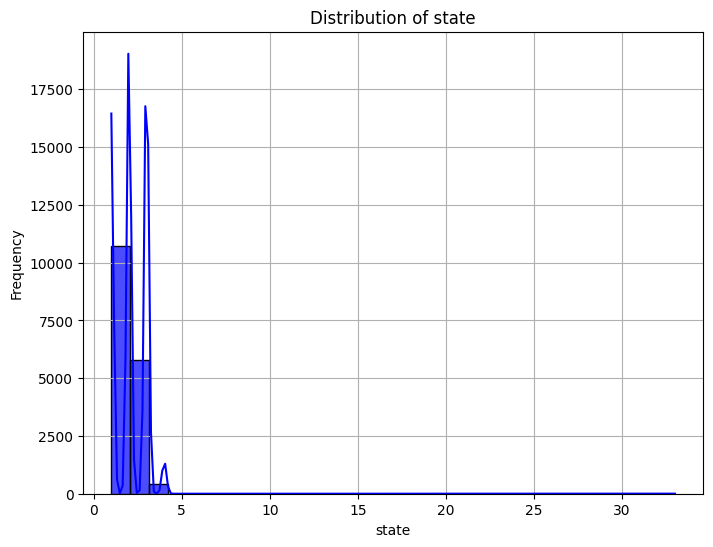

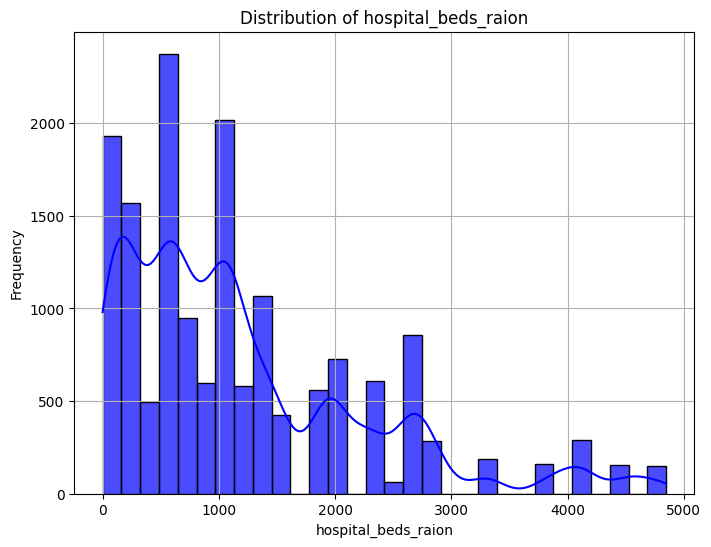

In [ ]:
# Calculate missing percentages for 'state' and 'hospital_beds_raion'
state_missing = missing_percentage.get('state', 0) * 100
hospital_beds_missing = missing_percentage.get('hospital_beds_raion', 0) * 100
print(f"Missing Percentage for 'state': {state_missing:.2f}%")
print(f"Missing Percentage for 'hospital_beds_raion': {hospital_beds_missing:.2f}%")

# Plot distributions for 'state' and 'hospital_beds_raion'
for column in ['state', 'hospital_beds_raion']:
    if column in train_df.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(train_df[column].dropna(), kde=True, bins=30, color='blue', alpha=0.7)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

In [8]:

# Fill missing values for 'state' with mode
if 'state' in train_df.columns:
    mode_state = train_df['state'].mode()[0]
    train_df['state'] = train_df['state'].fillna(mode_state)
    print(f"Filled missing values in 'state' with mode: {mode_state}")

# Fill missing values for 'hospital_beds_raion' with median
if 'hospital_beds_raion' in train_df.columns:
    median_hospital_beds = train_df['hospital_beds_raion'].median()
    train_df['hospital_beds_raion'] = train_df['hospital_beds_raion'].fillna(median_hospital_beds)
    print(f"Filled missing values in 'hospital_beds_raion' with median: {median_hospital_beds}")


Filled missing values in 'state' with mode: 2.0
Filled missing values in 'hospital_beds_raion' with median: 990.0


In [ ]:
# Find columns with up to 10% missing values
columns_below_10_percent = missing_percentage[(missing_percentage >= 0.0001) & (missing_percentage <= 0.1)].index.tolist()
print(f"Columns with up to 10% missing values: {columns_below_10_percent}")

# Check correlations for columns with up to 10% missing values
columns_up_to_10_percent = ['floor', 'metro_min_walk', 'metro_km_walk', 'railroad_station_walk_km',
                            'railroad_station_walk_min', 'ID_railroad_station_walk', 'cafe_sum_2000_min_price_avg',
                            'cafe_sum_2000_max_price_avg', 'cafe_avg_price_2000', 'cafe_sum_3000_min_price_avg',
                            'cafe_sum_3000_max_price_avg', 'cafe_avg_price_3000', 'prom_part_5000',
                            'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000']

for column in columns_up_to_10_percent:
    if column in train_df.columns and pd.api.types.is_numeric_dtype(train_df[column]):
        valid_data = train_df[[column, 'price_doc']].dropna()
        if len(valid_data) > 1:
            # Linear regression
            slope, intercept, r_value, p_value, std_err = linregress(valid_data[column], valid_data['price_doc'])
            print(f"Linear Analysis for {column}:")
            print(f"  Slope: {slope}")
            print(f"  Intercept: {intercept}")
            print(f"  R-squared: {r_value**2}")
            print(f"  P-value: {p_value}")
            print(f"  Standard Error: {std_err}\n")

            # Spearman correlation
            spearman_corr, spearman_p = spearmanr(valid_data[column], valid_data['price_doc'])
            print(f"Spearman Correlation for {column}: {spearman_corr}, P-value: {spearman_p}")

            # Kendall correlation
            kendall_corr, kendall_p = kendalltau(valid_data[column], valid_data['price_doc'])
            print(f"Kendall Correlation for {column}: {kendall_corr}, P-value: {kendall_p}")

            # Mutual information
            mutual_info = mutual_info_regression(valid_data[[column]], valid_data['price_doc'], random_state=0)
            print(f"Mutual Information for {column}: {mutual_info[0]}\n")
        else:
            print(f"Insufficient valid data for {column}.")


Columns with up to 10% missing values: ['floor', 'metro_min_walk', 'metro_km_walk', 'railroad_station_walk_km', 'railroad_station_walk_min', 'ID_railroad_station_walk', 'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg', 'cafe_avg_price_2000', 'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg', 'cafe_avg_price_3000', 'prom_part_5000', 'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000']
Linear Analysis for floor:
  Slope: 105598.0238838566
  Intercept: 6319830.775476974
  R-squared: 0.013793846589068594
  P-value: 1.567050516038274e-93
  Standard Error: 5129.337814571076

Spearman Correlation for floor: 0.1063742983952028, P-value: 5.659511470339237e-77
Kendall Correlation for floor: 0.07369836512641258, P-value: 1.974957156399846e-77
Mutual Information for floor: 0.07194073205094398

Linear Analysis for metro_min_walk:
  Slope: -12609.847351608678
  Intercept: 7661727.437403619
  R-squared: 0.03341087601681774
  P-value: 5.6246468832

In [10]:
# Remove specific columns below
columns_to_remove = ['cafe_sum_3000_min_price_avg', 'cafe_avg_price_3000', 'cafe_sum_5000_max_price_avg', 'railroad_station_walk_km', 'metro_km_walk']
# train_df = train_df.drop(columns=[col for col in columns_to_remove if col in train_df.columns])
print(f"Removed columns: {columns_to_remove}")

Removed columns: ['cafe_sum_3000_min_price_avg', 'cafe_avg_price_3000', 'cafe_sum_5000_max_price_avg', 'railroad_station_walk_km', 'metro_km_walk']


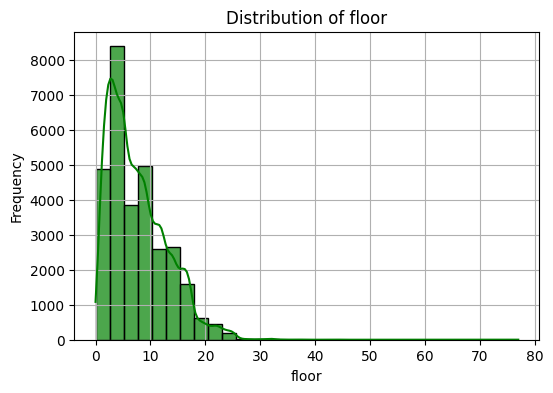

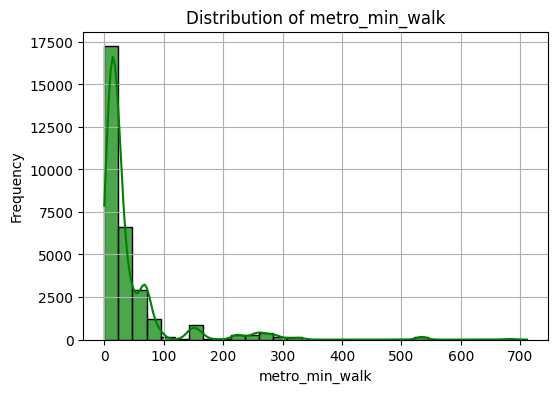

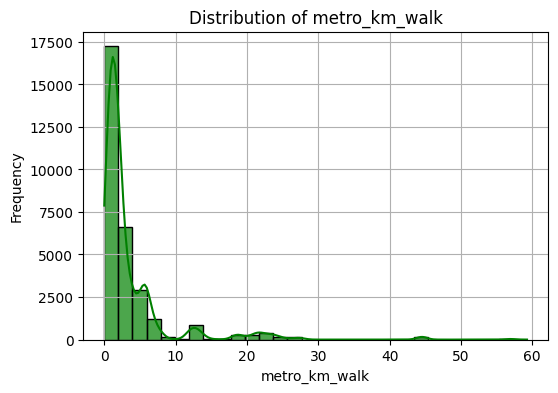

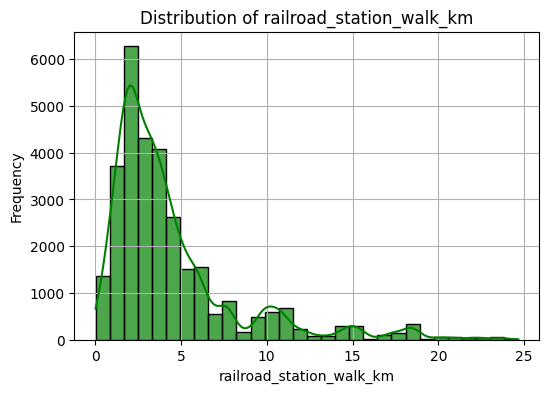

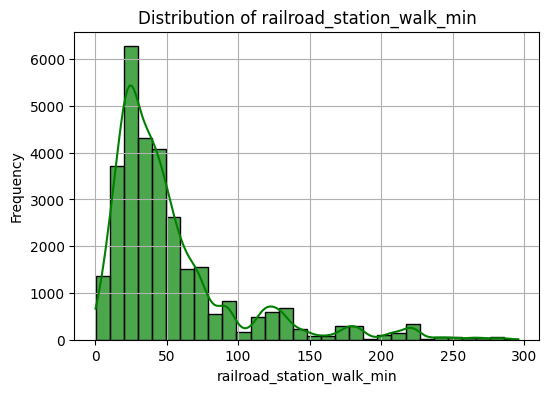

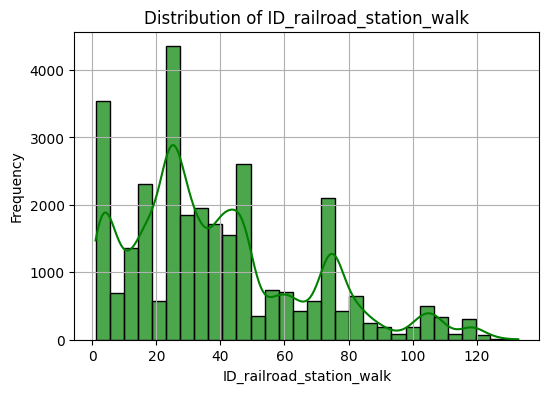

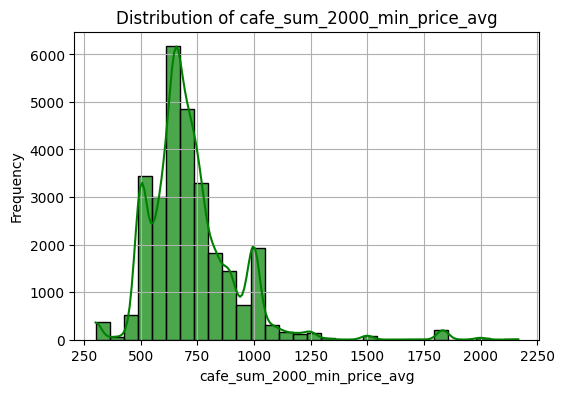

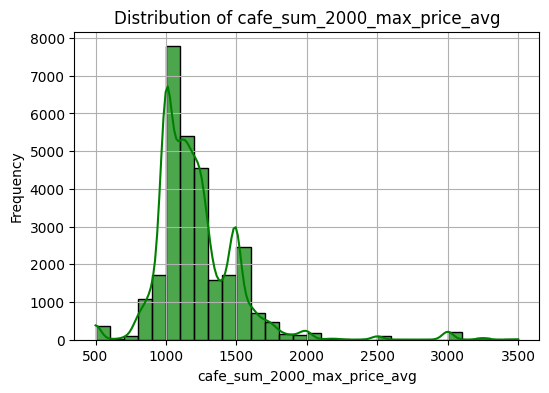

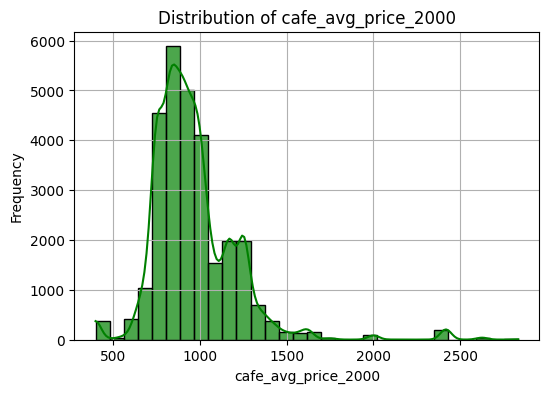

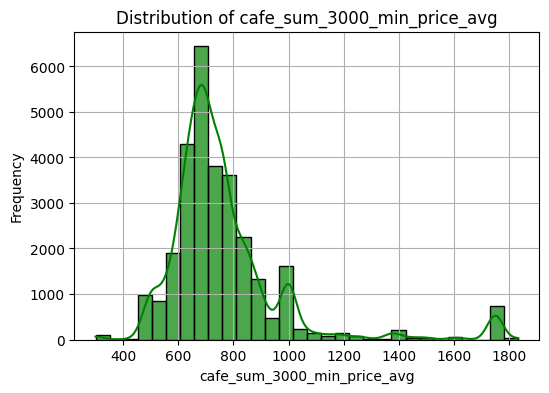

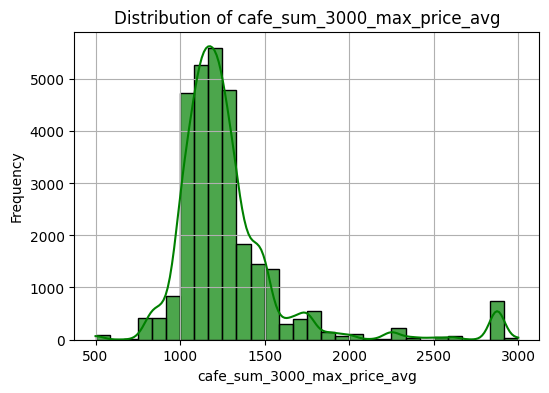

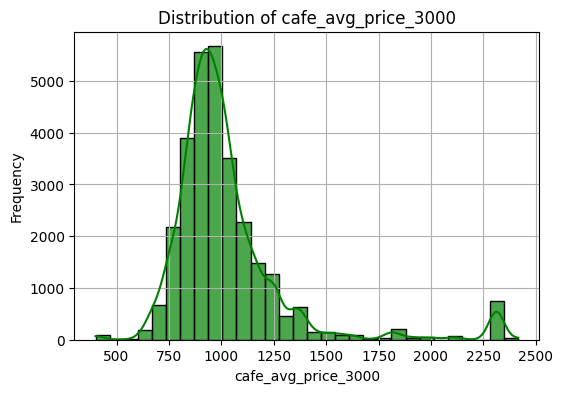

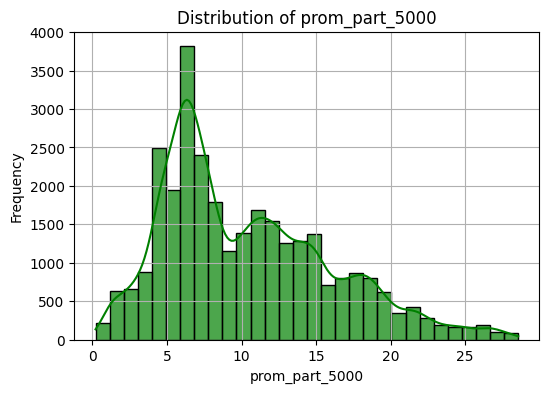

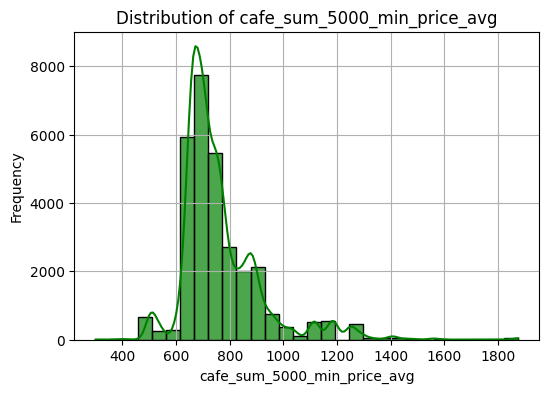

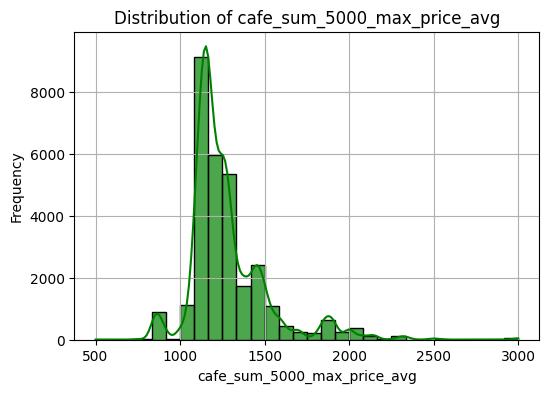

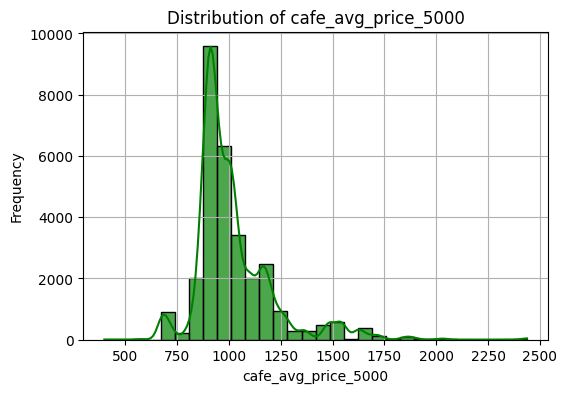

In [ ]:
# Plot distributions for columns with up to 10% missing values
for column in columns_below_10_percent:
    if column in train_df.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(train_df[column].dropna(), kde=True, bins=30, color='green', alpha=0.7)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()


In [ ]:
# Count and drop rows with missing values in 'ID_railroad_station_walk'
id_railroad_missing_count = train_df['ID_railroad_station_walk'].isnull().sum()
print(f"Number of rows with missing 'ID_railroad_station_walk': {id_railroad_missing_count}")

train_df = train_df.dropna(subset=['ID_railroad_station_walk'])
print(f"Dropped rows with missing 'ID_railroad_station_walk'. Remaining rows: {len(train_df)}")

Number of rows with missing 'ID_railroad_station_walk': 25
Dropped rows with missing 'ID_railroad_station_walk'. Remaining rows: 30446


In [13]:
# Fill missing values for remaining columns based on recommendations
columns_to_fill = {
    'floor': 'mode',
    'metro_min_walk': 'median',
    'railroad_station_walk_min': 'median',
    'cafe_sum_2000_min_price_avg': 'mean',
    'cafe_sum_2000_max_price_avg': 'mean',
    'cafe_avg_price_2000': 'mean',
    'prom_part_5000': 'median',
    'cafe_sum_5000_min_price_avg': 'mean',
    'cafe_avg_price_5000': 'mean'
}

for column, method in columns_to_fill.items():
    if column in train_df.columns:
        if method == 'mode':
            value_to_fill = train_df[column].mode()[0]
        elif method == 'median':
            value_to_fill = train_df[column].median()
        elif method == 'mean':
            value_to_fill = train_df[column].mean()
        train_df[column] = train_df[column].fillna(value_to_fill)
        print(f"Filled missing values in '{column}' with {method}: {value_to_fill}")


Filled missing values in 'floor' with mode: 3.0
Filled missing values in 'metro_min_walk' with median: 20.44720905
Filled missing values in 'railroad_station_walk_min' with median: 38.82647406
Filled missing values in 'cafe_sum_2000_min_price_avg' with mean: 719.8478162320254
Filled missing values in 'cafe_sum_2000_max_price_avg' with mean: 1210.694266912712
Filled missing values in 'cafe_avg_price_2000' with mean: 965.2711361025034
Filled missing values in 'prom_part_5000' with median: 8.97
Filled missing values in 'cafe_sum_5000_min_price_avg' with mean: 765.035016086769
Filled missing values in 'cafe_avg_price_5000' with mean: 1021.6072125111945


In [14]:
# Identify columns with 10% < missing percentage < 40%
columns_10_to_40_percent = missing_percentage[missing_percentage.between(0.1,0.4)].index.tolist()
print(f"Columns with missing percentage between 10% and 40%: {columns_10_to_40_percent}")


Columns with missing percentage between 10% and 40%: ['life_sq', 'max_floor', 'material', 'num_room', 'kitch_sq', 'preschool_quota', 'school_quota', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'build_count_frame', 'build_count_brick', 'build_count_monolith', 'build_count_panel', 'build_count_foam', 'build_count_slag', 'build_count_mix', 'raion_build_count_with_builddate_info', 'build_count_before_1920', 'build_count_1921-1945', 'build_count_1946-1970', 'build_count_1971-1995', 'build_count_after_1995', 'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1000', 'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg', 'cafe_avg_price_1500']


In [ ]:
# Analyze and handle columns with 10% < missing percentage < 40%
for column in columns_10_to_40_percent:
    if column in train_df.columns and pd.api.types.is_numeric_dtype(train_df[column]):
        valid_data = train_df[[column, 'price_doc']].dropna()
        if len(valid_data) > 1:
            # Linear regression
            slope, intercept, r_value, p_value, std_err = linregress(valid_data[column], valid_data['price_doc'])
            print(f"Linear Analysis for {column}:")
            print(f"  Slope: {slope}")
            print(f"  Intercept: {intercept}")
            print(f"  R-squared: {r_value**2}")
            print(f"  P-value: {p_value}")
            print(f"  Standard Error: {std_err}\n")

            # Spearman correlation
            spearman_corr, spearman_p = spearmanr(valid_data[column], valid_data['price_doc'])
            print(f"Spearman Correlation for {column}: {spearman_corr}, P-value: {spearman_p}")

            # Kendall correlation
            kendall_corr, kendall_p = kendalltau(valid_data[column], valid_data['price_doc'])
            print(f"Kendall Correlation for {column}: {kendall_corr}, P-value: {kendall_p}")

            # Mutual information
            mutual_info = mutual_info_regression(valid_data[[column]], valid_data['price_doc'], random_state=0)
            print(f"Mutual Information for {column}: {mutual_info[0]}\n")


Linear Analysis for life_sq:
  Slope: 15602.120802536281
  Intercept: 6811770.15100783
  R-squared: 0.02740964604081536
  P-value: 1.8149815450661405e-147
  Standard Error: 599.106413173774

Spearman Correlation for life_sq: 0.4084585656286312, P-value: 0.0
Kendall Correlation for life_sq: 0.300812190685665, P-value: 0.0
Mutual Information for life_sq: 0.4273632477790903

Linear Analysis for max_floor:
  Slope: 68719.19550931492
  Intercept: 6604182.947200562
  R-squared: 0.008962270092677482
  P-value: 9.13868993206465e-43
  Standard Error: 5001.866705019163

Spearman Correlation for max_floor: 0.07982507922374871, P-value: 7.318610058357181e-31
Kendall Correlation for max_floor: 0.05680651860472475, P-value: 1.2117980886029253e-31
Mutual Information for max_floor: 0.27955910529917016

Linear Analysis for material:
  Slope: 212548.95800032135
  Intercept: 7078909.931718872
  R-squared: 0.0041188659857130695
  P-value: 1.6726128160748363e-20
  Standard Error: 22876.620562574048

Spearm

In [ ]:
columns_to_remove_10_40 = ['material', 'build_count_wood', 'build_count_foam', 'build_count_slag', 'build_count_mix',
                           'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1000']
train_df = train_df.drop(columns=[col for col in columns_to_remove_10_40 if col in train_df.columns])
print(f"Removed columns with low relevance: {columns_to_remove_10_40}")

Removed columns with low relevance: ['material', 'build_count_wood', 'build_count_foam', 'build_count_slag', 'build_count_mix', 'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1000']


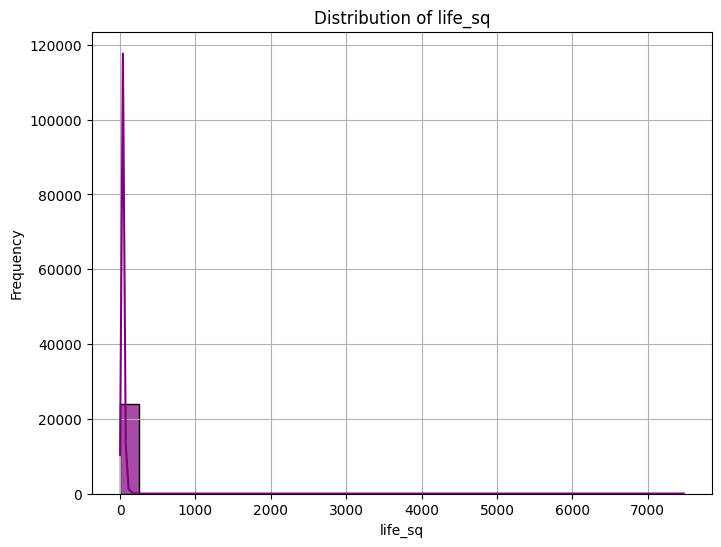

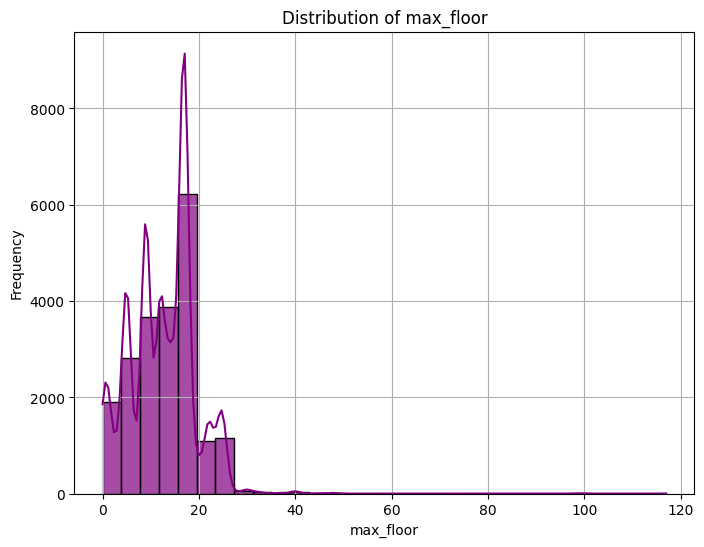

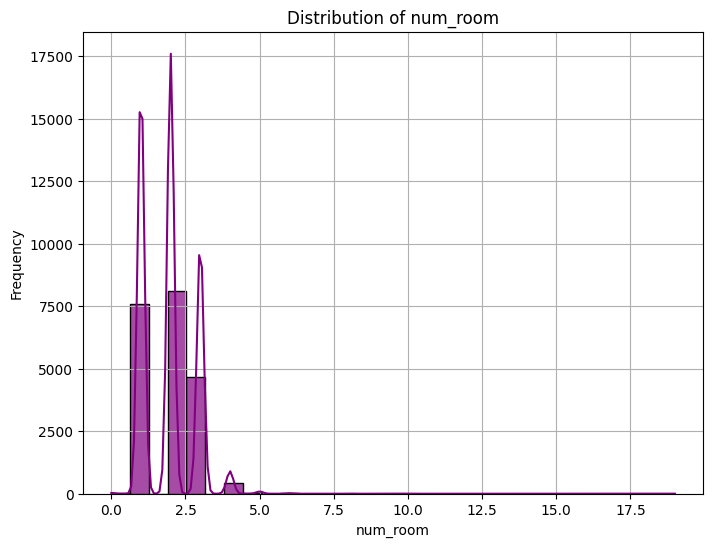

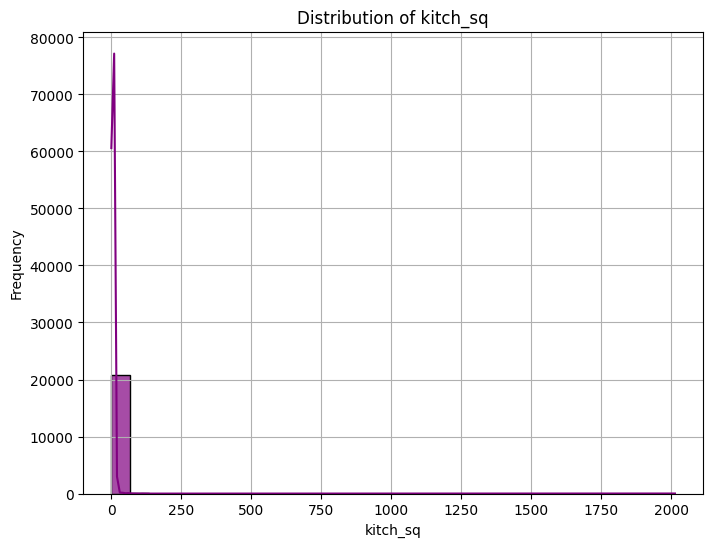

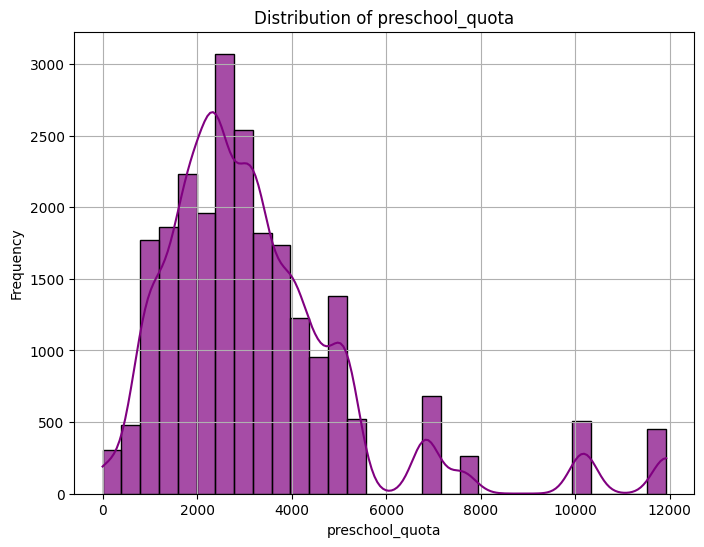

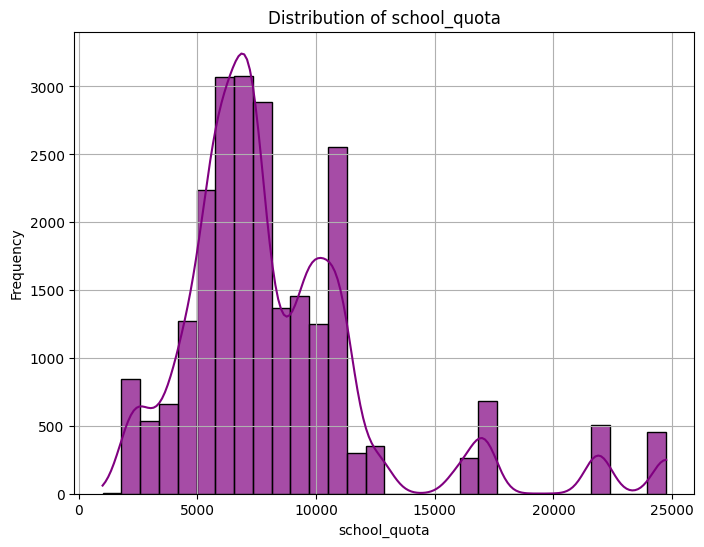

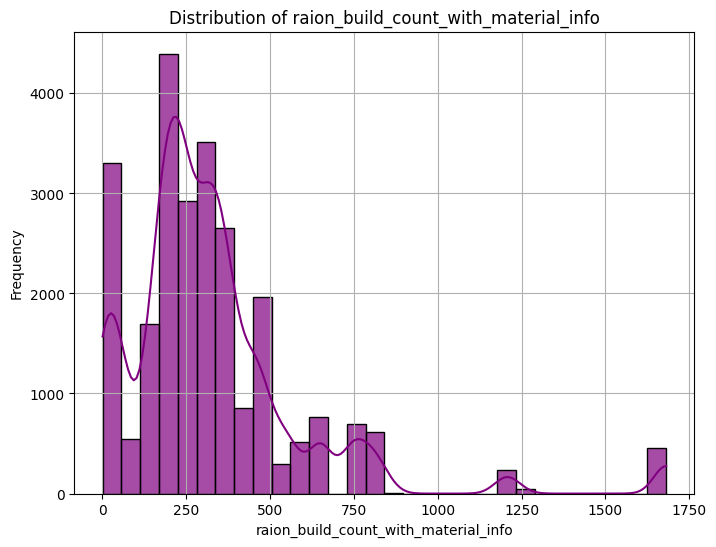

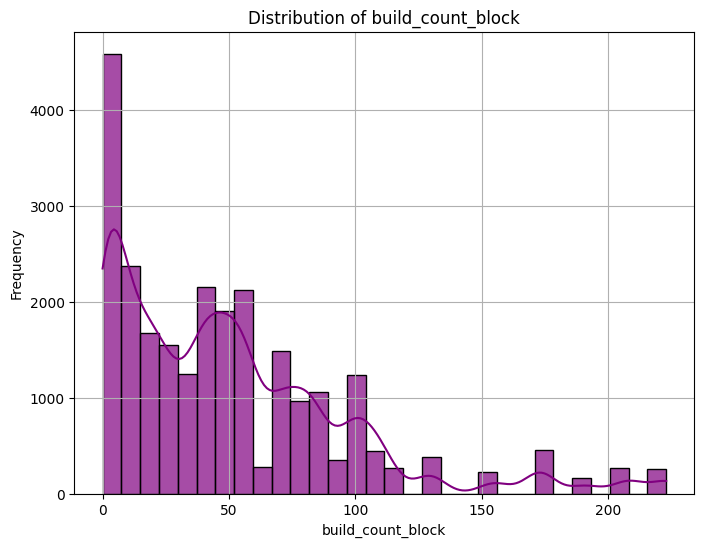

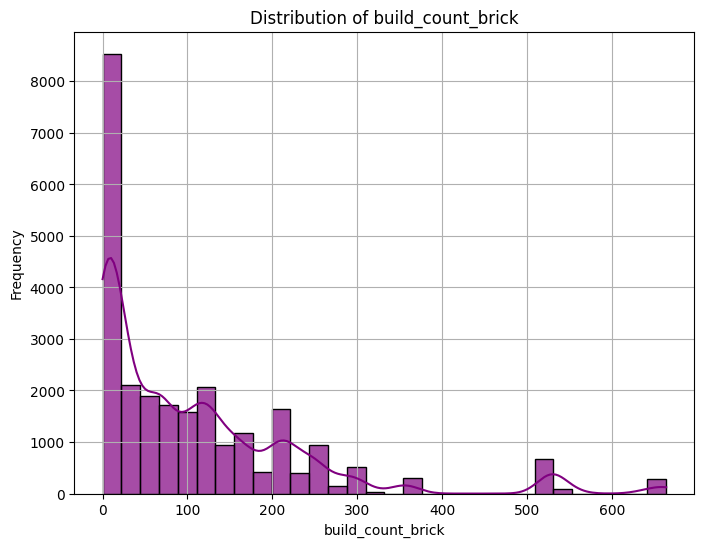

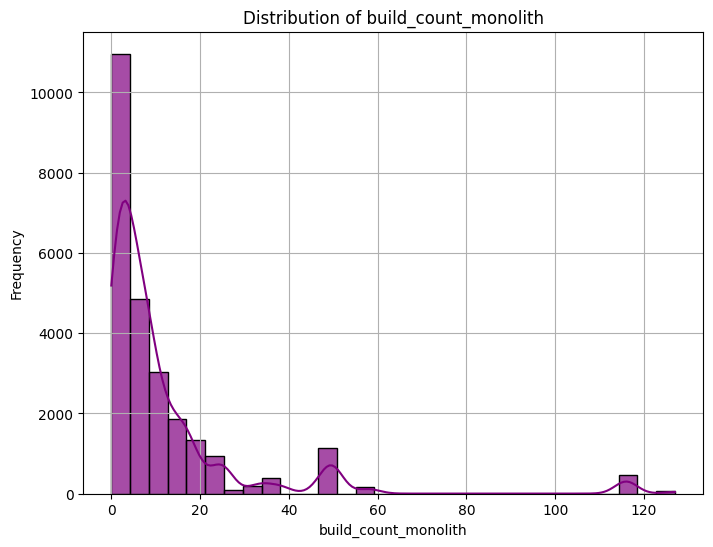

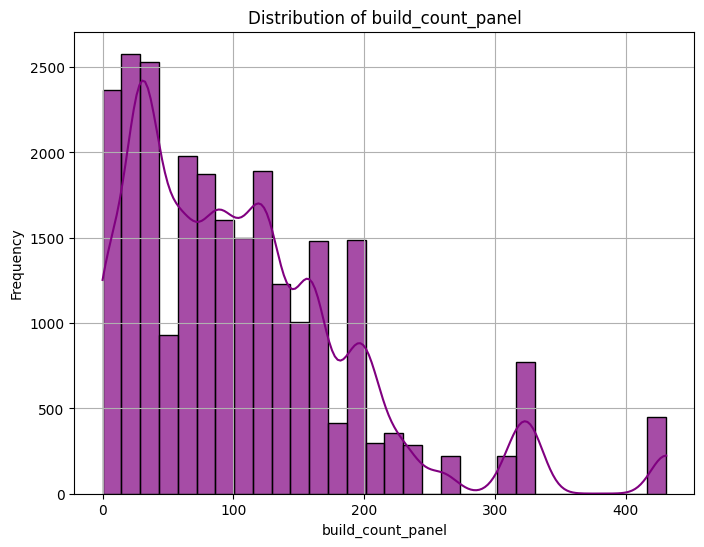

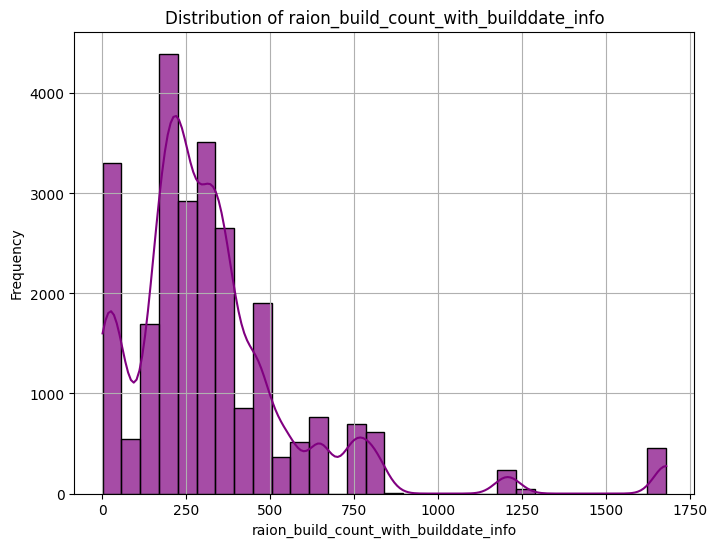

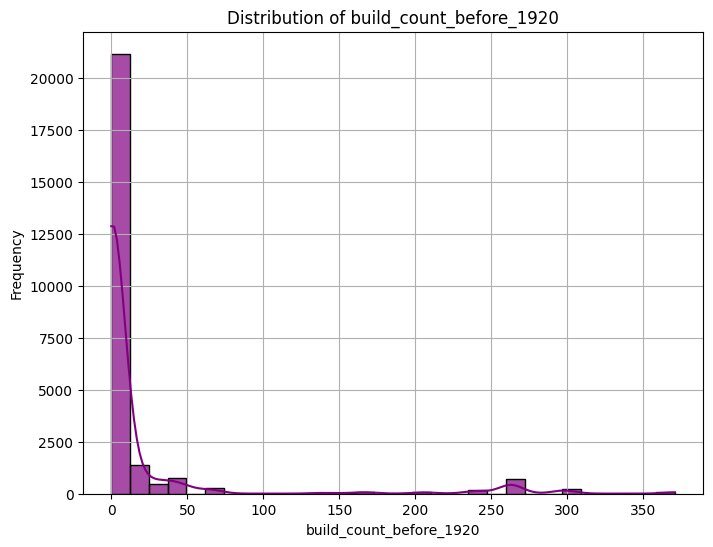

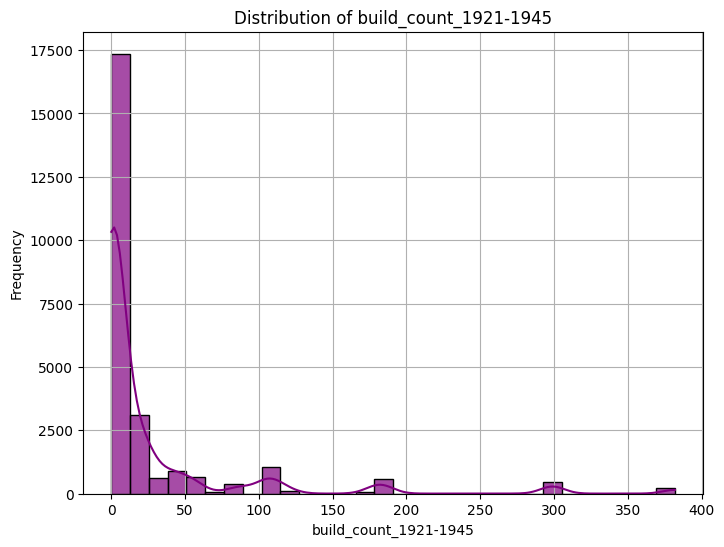

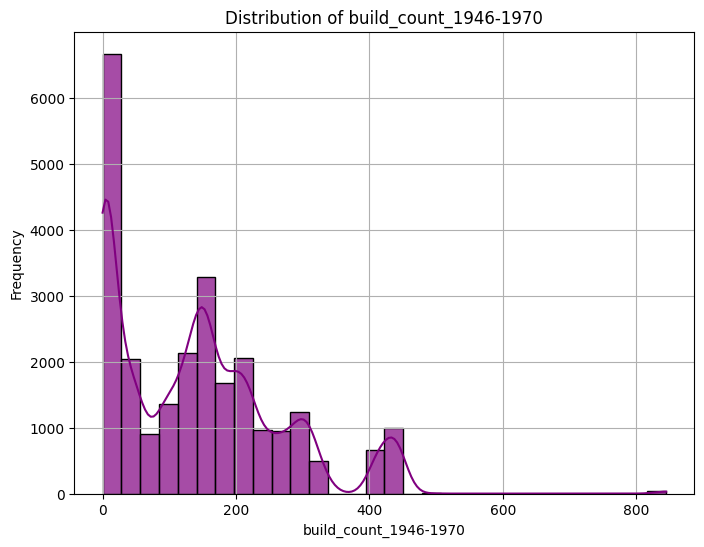

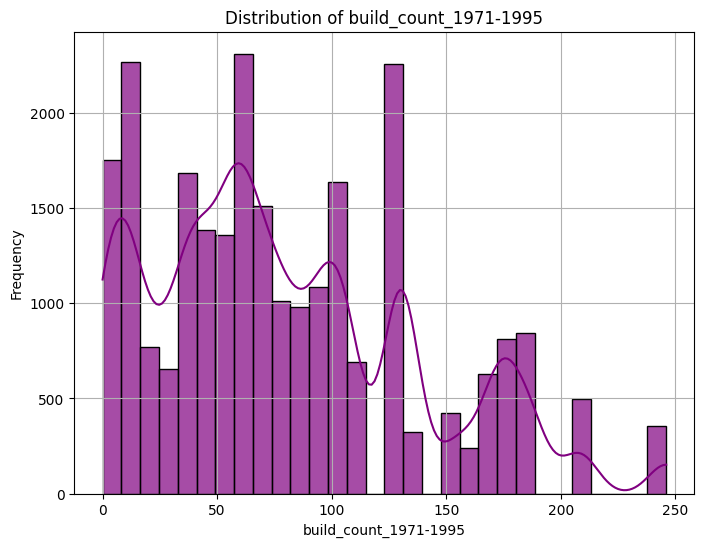

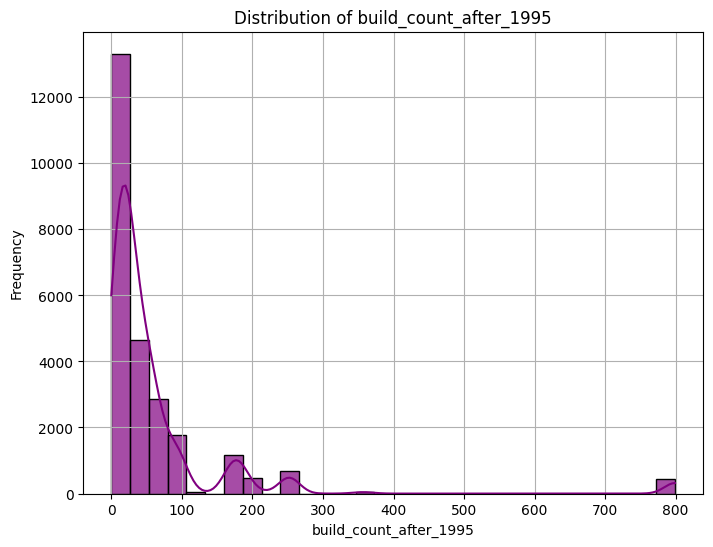

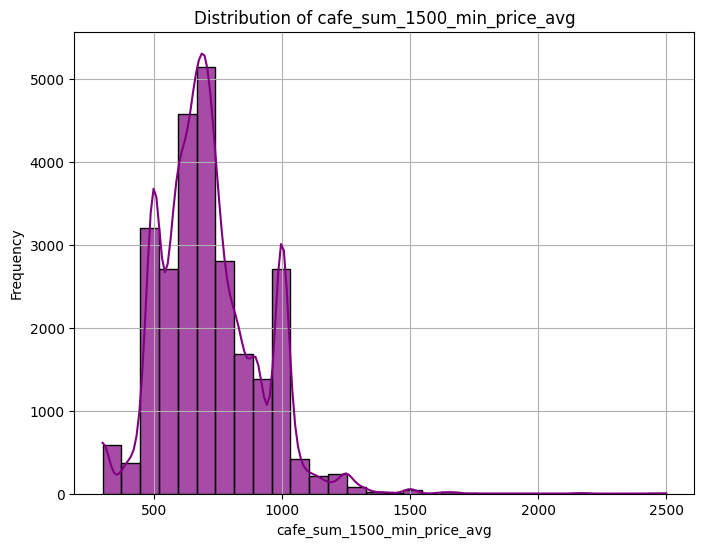

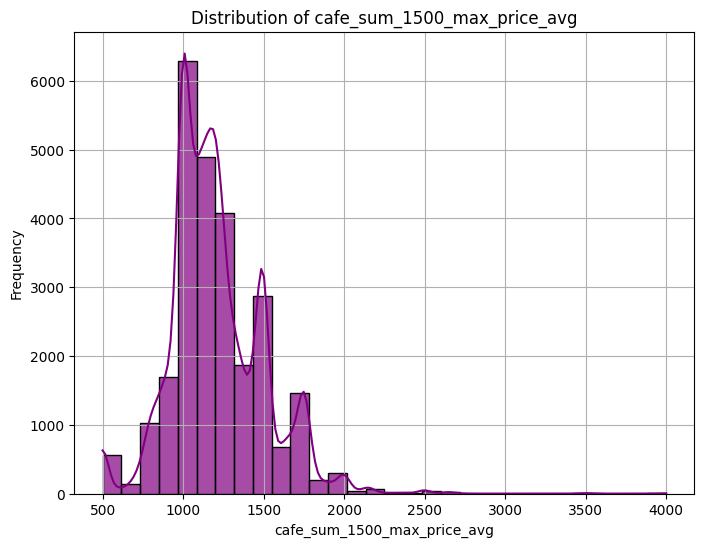

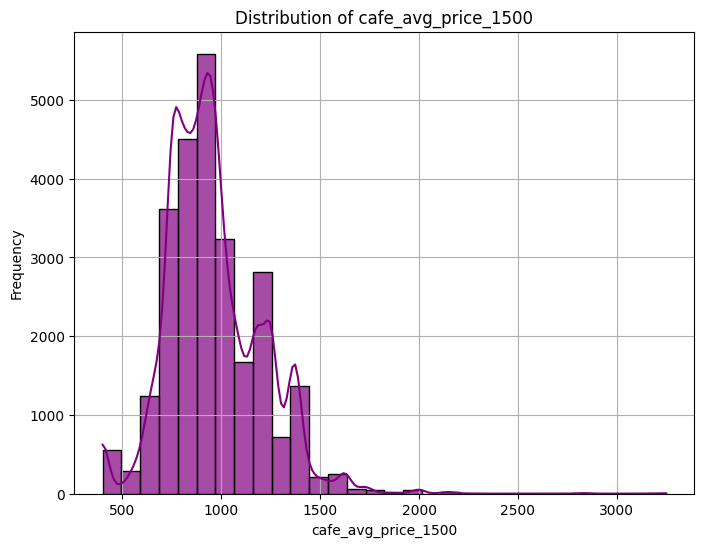

In [ ]:
# Analyze and handle columns with 10% < missing percentage < 40%
columns_10_to_40_percent = [
    'life_sq', 'max_floor', 'num_room', 'kitch_sq', 'preschool_quota', 'school_quota',
    'raion_build_count_with_material_info', 'build_count_block', 'build_count_brick', 'build_count_monolith',
    'build_count_panel', 'raion_build_count_with_builddate_info', 'build_count_before_1920',
    'build_count_1921-1945', 'build_count_1946-1970', 'build_count_1971-1995', 'build_count_after_1995',
    'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg', 'cafe_avg_price_1500'
]

for column in columns_10_to_40_percent:
    if column in train_df.columns:
        # Plot distribution
        plt.figure(figsize=(8, 6))
        sns.histplot(train_df[column].dropna(), kde=True, bins=30, color='purple', alpha=0.7)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()


In [ ]:
# Define replacement strategies
replacement_strategies = {
    'life_sq': 'median',
    'max_floor': 'mean',
    'num_room': 'median',
    'kitch_sq': 'median',
    'preschool_quota': 'mean',
    'school_quota': 'mean',
    'raion_build_count_with_material_info': 'mean',
    'build_count_block': 'median',
    'build_count_brick': 'median',
    'build_count_monolith': 'median',
    'build_count_panel': 'median',
    'raion_build_count_with_builddate_info': 'mean',
    'build_count_before_1920': 'median',
    'build_count_1921-1945': 'median',
    'build_count_1946-1970': 'mean',
    'build_count_1971-1995': 'median',
    'build_count_after_1995': 'median',
    'cafe_sum_1500_min_price_avg': 'mean',
    'cafe_sum_1500_max_price_avg': 'mean',
    'cafe_avg_price_1500': 'mean'
}

for column, method in replacement_strategies.items():
    if column in train_df.columns:
        if method == 'mode':
            value_to_fill = train_df[column].mode()[0]
        elif method == 'median':
            value_to_fill = train_df[column].median()
        elif method == 'mean':
            value_to_fill = train_df[column].mean()
        train_df[column] = train_df[column].fillna(value_to_fill)
        print(f"Filled missing values in '{column}' with {method}: {value_to_fill}")

Filled missing values in 'life_sq' with median: 30.0
Filled missing values in 'max_floor' with mean: 12.559020791415158
Filled missing values in 'num_room' with median: 2.0
Filled missing values in 'kitch_sq' with median: 6.0
Filled missing values in 'preschool_quota' with mean: 3272.4743908084674
Filled missing values in 'school_quota' with mean: 8327.013844470628
Filled missing values in 'raion_build_count_with_material_info' with mean: 328.71176054678295
Filled missing values in 'build_count_block' with median: 42.0
Filled missing values in 'build_count_brick' with median: 67.0
Filled missing values in 'build_count_monolith' with median: 6.0
Filled missing values in 'build_count_panel' with median: 92.0
Filled missing values in 'raion_build_count_with_builddate_info' with mean: 328.37933066226725
Filled missing values in 'build_count_before_1920' with median: 0.0
Filled missing values in 'build_count_1921-1945' with median: 2.0
Filled missing values in 'build_count_1946-1970' with m

In [ ]:
threshold = 0.000000001

# Calculate percentage of missing values in train dataset
missing_percentage = train_df.isnull().mean()
columns_above_threshold = missing_percentage[missing_percentage > threshold].index.tolist()
columns_above_threshold

['build_count_frame',
 'cafe_sum_3000_min_price_avg',
 'cafe_sum_3000_max_price_avg',
 'cafe_avg_price_3000',
 'cafe_sum_5000_max_price_avg']

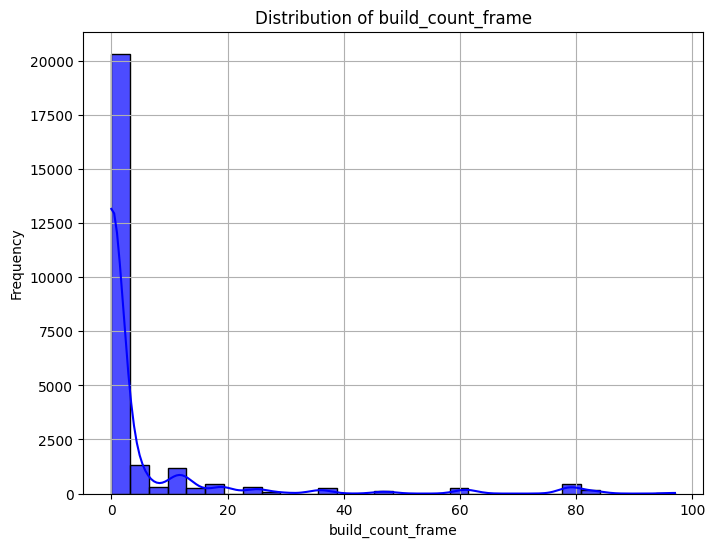

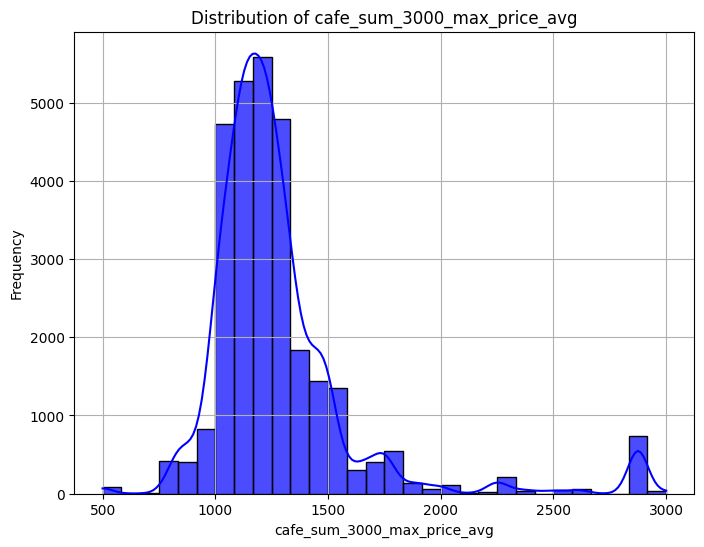

In [ ]:
# Plot distributions for specific columns
columns_to_plot = ['build_count_frame', 'cafe_sum_3000_max_price_avg']
for column in columns_to_plot:
    if column in train_df.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(train_df[column].dropna(), kde=True, bins=30, color='blue', alpha=0.7)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

In [ ]:
# Fill missing values for additional columns
columns_to_fill = {
    'build_count_frame': 'median',
    'cafe_sum_3000_max_price_avg': 'mean'
}

for column, method in columns_to_fill.items():
    if column in train_df.columns:
        if method == 'median':
            value_to_fill = train_df[column].median()
        elif method == 'mean':
            value_to_fill = train_df[column].mean()
        train_df[column] = train_df[column].fillna(value_to_fill)
        print(f"Filled missing values in '{column}' with {method}: {value_to_fill}")

# Check if there are still columns with missing values
missing_values = train_df.isnull().sum()
columns_with_na = missing_values[missing_values > 0]

if not columns_with_na.empty:
    print("Columns with missing values after filling:")
    print(columns_with_na)
else:
    print("No missing values remain in the dataset.")

# fill physically impossible values
train_df.loc[train_df['full_sq']==0,'full_sq'] = train_df['full_sq'].mean()

Filled missing values in 'build_count_frame' with median: 0.0
Filled missing values in 'cafe_sum_3000_max_price_avg' with mean: 1283.2820444746221
Columns with missing values after filling:
cafe_sum_3000_min_price_avg    991
cafe_avg_price_3000            991
cafe_sum_5000_max_price_avg    297
dtype: int64


C:\Users\yonatan.rubin\AppData\Local\Temp\ipykernel_18456\1720850857.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '54.20659528345267' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.loc[train_df['full_sq']==0,'full_sq'] = train_df['full_sq'].mean()


In [ ]:
from scipy.stats import zscore

# Identify columns with more than 20% outliers using Z-Score
columns_with_high_outliers = []

for column in train_df.select_dtypes(include=[np.number]).columns:
    z_scores = zscore(train_df[column].dropna())
    outliers = np.where(np.abs(z_scores) > 3)
    percentage_outliers = len(outliers[0]) / len(train_df[column].dropna())
    if percentage_outliers > 0.05:
        columns_with_high_outliers.append(column)


print("Columns with more than 5% outliers:", columns_with_high_outliers)


Columns with more than 5% outliers: ['mosque_count_2000']


### pca
since we have a lot of highly correlated features we want to reduce the amount of them. 

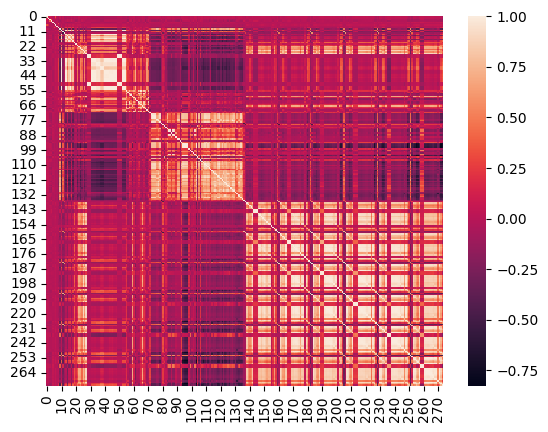

<Axes: >

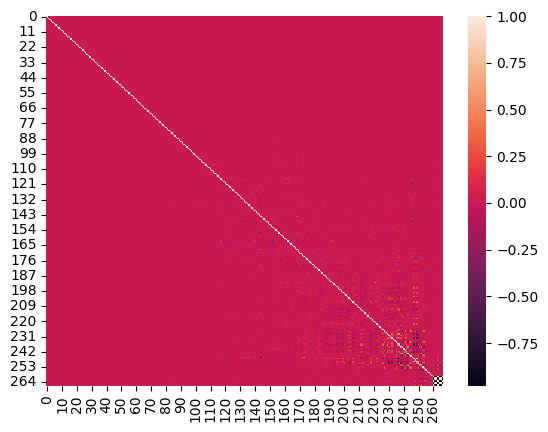

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components="mle",svd_solver='auto')
train_pca=pca.fit_transform(model_df.select_dtypes(include=["int64","float64"]))
(train_pca.shape,model_df.shape)
sns.heatmap(np.corrcoef(model_df.drop(['id','price_doc'],axis=1).select_dtypes(include=["int64","float64"]),rowvar=False))
plt.show()
sns.heatmap(np.corrcoef(train_pca,rowvar=False))

# regularization for feature selection
oopsie doopsie, PCA gives us orthogonal features, so we can't assess the colinearity problem! let's use regularization instead 

<Axes: >

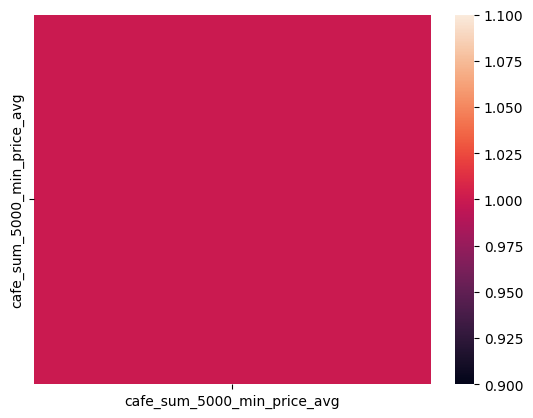

In [ ]:
from sklearn.linear_model import ElasticNetCV
elastic_net = ElasticNetCV()
threshold = 0
elastic_net.fit(model_df.select_dtypes(include=["int64","float64"]),np.log(model_df['price_doc']))
subset = model_df[model_df.columns[np.where(elastic_net.coef_>threshold)]]
sns.heatmap(subset.corr())

# manual filtering
well sadly as we can see regularization is way too harsh. instead we will check for correlation and filter using a manual threshold

In [132]:
train_clean = (model_df.copy()
               .drop([c for c in train_df.columns if c.startswith('ID')], axis=1)
                )

train_clean = train_clean.drop(columns=['id'])

# # normalize
# numerical = train_clean.select_dtypes(include=['float64', 'int64']).drop(['id','price_doc'],axis=1)
# train_clean[numerical.columns]=(numerical-numerical.mean(axis=0))/numerical.std(axis=0)



print(train_clean.select_dtypes(include=['float64', 'int64']).shape)

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.select_dtypes(include=['float64','int64']).corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                break
    return col_corr

correlated_columns= correlation(train_clean,0.9)
train_clean = train_clean.drop(columns=correlated_columns)
print(train_clean.shape)

train_clean['year'] = pd.DatetimeIndex(train_clean['timestamp']).year
train_clean['month'] = pd.DatetimeIndex(train_clean['timestamp']).month
train_clean=train_clean.drop(['timestamp'],axis=1)
# there are way too many sub_areas for normal dummies
train_clean['sub_area'] = train_clean['sub_area'].map(train_clean.groupby('sub_area')['price_doc'].mean())

categorical = train_clean.select_dtypes(include=['object', 'category']).columns.append(pd.Index(['year']))
train_clean = pd.get_dummies(train_clean,columns=categorical,drop_first=True,prefix='dummy_'+categorical,dtype='int64')

majority = train_clean["price_doc"].quantile([0.025,0.975])
# remove outliers
print(f'price_doc 95\% between {list(majority)}')
train_clean=train_clean.loc[train_clean['price_doc'].between(*majority),:]
print(train_clean.shape)

(30471, 268)
(30471, 150)
price_doc 95\% between [1000000.0, 17822718.0]
(29476, 157)


In [149]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.compose import TransformedTargetRegressor
class TargetValueTransformer(TransformedTargetRegressor):
    def __init__(
        self,
        regressor=None,
        *,
        transformer=None,
        func=None,
        inverse_func=None,
        check_inverse=False,
    ):        
        super(TargetValueTransformer, self).__init__(regressor,        
        transformer=transformer,
        func=func,
        inverse_func=inverse_func,
        check_inverse=check_inverse,
)
      
    def _fit_transformer(self, y):
        pass
        
    def fit(self, X, y):
        self.regressor.fit(X, self.func(X, y))
        return self
    
    def predict(self, X):
        return self.inverse_func(X, self.regressor.predict(X))
    
def transform(X,y):
    transformed = np.log(y/(X['full_sq']+0.01))
    return transformed.fillna(np.mean(y))
def inverse_transform(X,y):
    transformed = np.exp(y)*X['full_sq']
    return transformed

In [233]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import  root_mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

normalized_train,normalized_test = train_test_split(train_clean)

pipe = TargetValueTransformer(Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
    ]),
    func=transform,
    inverse_func=inverse_transform
)

pipe.fit(normalized_train.drop(['price_doc'],axis=1),normalized_train['price_doc'])

predict=pipe.predict(normalized_test.drop(['price_doc'],axis=1))
root_mean_squared_log_error(y_pred=predict,y_true=normalized_test['price_doc'])

np.float64(0.5182081375886188)

In [283]:
### How will the regularization model cope now?
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, cross_validate

splitter = TimeSeriesSplit()
model_lasso = TargetValueTransformer(
    Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components='mle',svd_solver='full')),('lasso',Lasso())]),
    func=transform,
    inverse_func=inverse_transform
    )

parameters = {
    'regressor__lasso__alpha': np.arange(0.01,1,step=0.1)
}

print(parameters)
X,Y = train_clean.drop('price_doc',axis=1),train_clean['price_doc']
res=grid_search = GridSearchCV(model_lasso, parameters,
                                scoring='neg_root_mean_squared_log_error',
                                cv=splitter,
                                return_train_score=True
                                ).fit(X,Y)
model_lasso.set_params(**grid_search.best_params_)



{'regressor__lasso__alpha': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91])}


TargetValueTransformer(func=<function transform at 0x0000020327A78B80>,
                       inverse_func=<function inverse_transform at 0x0000020327A79120>,
                       regressor=Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('pca',
                                                  PCA(n_components='mle',
                                                      svd_solver='full')),
                                                 ('lasso',
                                                  Lasso(alpha=np.float64(0.01)))]))

In [287]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__lasso__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.032108,0.147094,0.014531,0.001338,0.01,{'regressor__lasso__alpha': 0.01},-0.418123,-0.496162,-0.529349,-0.529278,...,-0.485855,0.043222,1,-0.509262,-0.460131,-0.460206,-0.477795,-0.486727,-0.478824,0.018363
1,1.008119,0.161978,0.013775,0.000915,0.11,{'regressor__lasso__alpha': 0.11},-0.420706,-0.475091,-0.544025,-0.547054,...,-0.493276,0.047443,2,-0.534896,-0.480321,-0.478614,-0.496289,-0.506500,-0.499324,0.020572
2,1.007856,0.161778,0.013401,0.001039,0.21,{'regressor__lasso__alpha': 0.21000000000000002},-0.425592,-0.477119,-0.543990,-0.549069,...,-0.495482,0.046126,3,-0.537746,-0.483475,-0.481700,-0.499222,-0.509674,-0.502364,0.020489
3,1.032060,0.151904,0.016521,0.004652,0.31,{'regressor__lasso__alpha': 0.31000000000000005},-0.433211,-0.481656,-0.546648,-0.553512,...,-0.500272,0.044773,4,-0.542345,-0.488557,-0.486673,-0.503936,-0.514190,-0.507140,0.020315
4,1.023594,0.156043,0.014643,0.001240,0.41,{'regressor__lasso__alpha': 0.41000000000000003},-0.440689,-0.486309,-0.551053,-0.557872,...,-0.505428,0.043796,5,-0.546708,-0.493522,-0.492469,-0.508273,-0.518680,-0.511930,0.019930
5,1.028241,0.159530,0.013592,0.000493,0.51,{'regressor__lasso__alpha': 0.51},-0.445880,-0.488528,-0.553282,-0.560497,...,-0.508274,0.043043,6,-0.549401,-0.496342,-0.495315,-0.511029,-0.521347,-0.514687,0.019872
6,1.017126,0.155825,0.012998,0.000632,0.61,{'regressor__lasso__alpha': 0.6100000000000001},-0.451898,-0.491436,-0.556181,-0.563806,...,-0.511872,0.042251,7,-0.552660,-0.499755,-0.498758,-0.514363,-0.524571,-0.518021,0.019804
7,1.024470,0.167179,0.013311,0.000809,0.71,{'regressor__lasso__alpha': 0.7100000000000001},-0.458710,-0.495021,-0.559739,-0.567788,...,-0.516205,0.041426,8,-0.556478,-0.503746,-0.502785,-0.518261,-0.528342,-0.521922,0.019725
8,1.026876,0.157470,0.013917,0.001396,0.81,{'regressor__lasso__alpha': 0.81},-0.463958,-0.499269,-0.563943,-0.572427,...,-0.520789,0.041212,9,-0.559491,-0.508304,-0.507383,-0.522712,-0.532647,-0.526107,0.019164
9,1.021756,0.159025,0.014582,0.001579,0.91,{'regressor__lasso__alpha': 0.91},-0.463958,-0.504161,-0.566628,-0.574433,...,-0.523177,0.041605,10,-0.559491,-0.513413,-0.510259,-0.524615,-0.534772,-0.528510,0.017750


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
xgb_pipe = TargetValueTransformer(
    Pipeline([
        ('scaler',StandardScaler()),
        # ('pca',PCA(n_components=15)),
        ('xgb',xgb_model)
        ]),
    func=transform,
    inverse_func=inverse_transform
)                              
for parameters in [
    # {
    # 'pca__n_components':np.arange(15,156,10)
    # },
    {
            "xgb__max_depth" : np.arange(1,15,1),
            "xgb__min_samples_leaf":np.arange(50,1000,250), 
           }
    ]:
    print(f'tuning:{list(parameters.keys())}')
    parameters = {'regressor__'+key: value for key,value in parameters.items()}
    print(parameters)
    grid_search = GridSearchCV(xgb_pipe, parameters,
                                    scoring='neg_root_mean_squared_log_error',
                                    cv=splitter,
                                    n_jobs=-1,verbose=10).fit(X,Y)
    print(grid_search.best_params_)
    xgb_pipe.set_params(**grid_search.best_params_)
pd.DataFrame(cross_validate(grid_search.best_estimator_,X,Y,cv=splitter,scoring='neg_root_mean_squared_log_error')).mean()

tuning:['xgb__max_depth', 'xgb__min_samples_leaf']
{'regressor__xgb__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'regressor__xgb__min_samples_leaf': array([ 50, 300, 550, 800])}
Fitting 5 folds for each of 56 candidates, totalling 280 fits


c:\Users\yonatan.rubin\code\PERSONAL\ML_final\venv\Lib\site-packages\numpy\ma\core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\yonatan.rubin\code\PERSONAL\ML_final\venv\Lib\site-packages\xgboost\training.py:182: UserWarning: [17:04:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'regressor__xgb__max_depth': np.int64(1), 'regressor__xgb__min_samples_leaf': np.int64(50)}


c:\Users\yonatan.rubin\code\PERSONAL\ML_final\venv\Lib\site-packages\xgboost\training.py:182: UserWarning: [17:04:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\yonatan.rubin\code\PERSONAL\ML_final\venv\Lib\site-packages\xgboost\training.py:182: UserWarning: [17:04:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\yonatan.rubin\code\PERSONAL\ML_final\venv\Lib\site-packages\xgboost\training.py:182: UserWarning: [17:04:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\yonatan.rubin\code\PERSONAL\ML_final\venv\Lib\site-packages\xgboost\training.py:182: UserWarning: [17:04:31] WARNING: C:\actions-runner\_work\xgb

fit_time      0.269822
score_time    0.015277
test_score   -0.453614
dtype: float64

<Axes: >

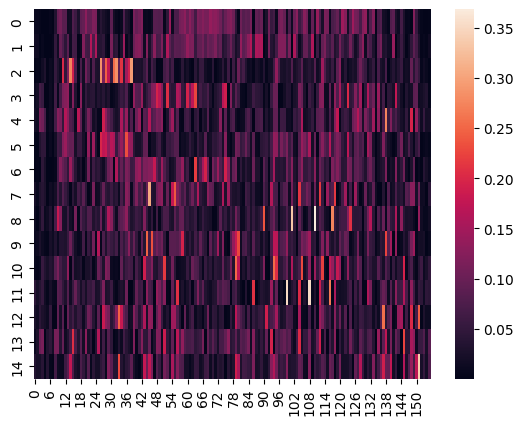

In [189]:
from xgboost import XGBRegressor


regressor:XGBRegressor = grid_search.best_estimator_.regressor['xgb']
pca:PCA = grid_search.best_estimator_.regressor['pca']
regressor.feature_importances_
sns.heatmap(np.abs(pca.components_))

c:\Users\yonatan.rubin\code\PERSONAL\ML_final\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='full_sq', ylabel='price_doc'>

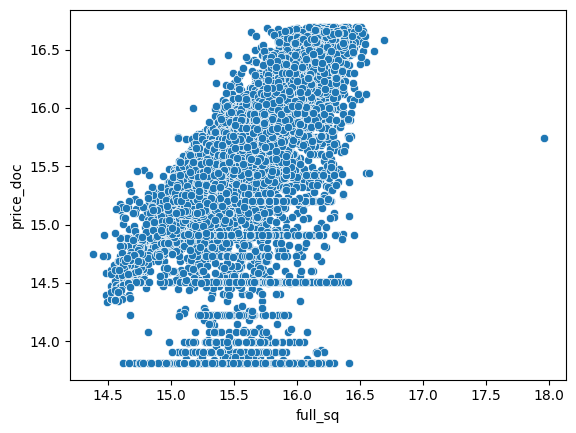

In [223]:
model=grid_search.best_estimator_.regressor['xgb']
# xgb.plot_tree(model,num_trees=0)

# np.mean((np.log(Y)-np.log())**2)